# New tasks:
- make a function/object that read a fasta file from disk and **yields** (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU


>AJGHDJHASGDJAS khsk skdjfhskdj slkshd skhksjdf
CACGUAGCAUGCUAGCAUGCUAGCAUGCUAGCUAGCUGAC 276512764523765423764527365427365427542735427
CAUCGUAGCUAGCUAGCUAGCUACG
AUCGUAGUAGCUAGCUAGCUAGCUAGC

- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)
(AJGHDJHASGDJAS khsk skdjfhskdj slkshd skhksjdf, CACGUAGCAUGCUAGCAUGCUAGCAUGCUAGCUAGCUGACCAUCGUAGCUAGCUAGCUAGCUACGAUCGUAGUAGCUAGCUAGCUAGCUAGC)

- separately:
- make a function that receives in input the list of sequences, and yields structure graphs (use RNAfold)
- make a function that receives a iterator over graphs and i,j and plots (use matplotlib and networkx) only graphs from num i to num j


1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

In [253]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
from eden.util import display

#class names with CamelStyle
#function names with underscore_style
#always named arguments to functions
class FastaToGraph(object):
    def __init__(self, mode= 'RNAfold'):
        #pass
        self.mode = mode
    
    def _sequeceWrapper(self, file_path=None):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head, seq = self._readFastaFile(file_path)
        seqs = self._removeCommends(seq)
        #seq = self._fold(seqs)
        #print ("path", path)
        return seqs
    
    def _fold(self, seq):
        seq, struc = self._get_sequence_structure(seq)
        #G = self._make_graph(seq, struc)
        return  seq, struc  
    
    
# read a fasta file separate the head and the sequence
    def _readFastaFile(self, file_path=None):
        head_start = '>'
        #heads = []
        #seqs = []
        head = []
        seq = []
        seq_temps = []
        string_seq = ''        

        #for file in os.listdir(path): #open file
        read_file = open(file_path,'r')            
            # seperate the head and the sequence
        for line in read_file:
            lines = list(line)
                # the read line is the head of the sequence write it in head list
            if lines[0] == head_start:
                line = line.strip(head_start)
                head.append(line)
                seq.append(string_seq)
                seq_temps = []

                # the read line is a sequence writ it in a sequence list
            if lines[0] != head_start:
                seq_temps.append(line)
                string_seq= ''.join(seq_temps)
        seq.append(string_seq)
        seq = filter(None, seq)
        print seq

        #print ("head", head)
        #print ("seq", seq)         
        return head, seq

        #seqs.append(string_seq)      
                  
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommends(self, seq):
        not_added_string = []
        input_seqs = seq
        sequences = []
        seqs = []
        
        for seq in input_seqs:
            seqs_temp = []
            for i, letter in enumerate(seq):                 
                if letter == "A" or letter == "C" or letter == "G" or letter == "U":
                    seq_list = []
                    seq_list = ''.join(letter)
                    seqs_temp.append(seq_list)
                    
                else:
                    if letter == " " or letter != "A" or letter != "C" or letter != "G" or letter != "U":
                        not_added_string.append(letter)
            seqs.append(seqs_temp)
        
        for seq in seqs:
            string_seqs = ''
            string_seqs = ''.join(seq)
            sequences.append(string_seqs)
            
        print ("sequences", sequences)     
        print ('final not_added:', not_added_string)
        return sequences

    
        #call RNAfold to get the sequence structure
    def _get_sequence_structure(self, seqs):
        print "im here"
        if self.mode == 'RNAfold':
            for seq in seqs:
                return self._rnafold_wrapper(seqs)
        else:
            raise Exception('Not known: %s'% self.mode)
    
    def _rnafold_wrapper(self, sequence):
        print "rnafold"
        print ("sequence", sequence)
        #for i, seq in sequence:
            #print ("seq of sequences:", seq)
            #print ("i of sequences:", i)
        flags='--noPS'
        cmd = 'echo "%s" | RNAfold %s' % (sequence, flags)
        out = sp.check_output(cmd, shell=True)
        print ("out", out)
        text = out.strip().split('\n')
        seq= text[0]
        print("seq",seq)
        struc= text[1].split()[0]
        print ("strc", struc)
        print '#################'
        return seq, struc
        
        #Recognize basepairs and add them to the generated graph
    def _make_graph(self, seq, struc):
            print ("seq-graph", seq)
            print ("struc-graph", struc)
            open_pran = "("
            close_pran = ")"
            stack_o = []
            stack_c = []
            G = nx.Graph()
            seq_struc_zip = zip(seq, struc)
            seq_len = len(seq)
            struc_len = len(struc)
            print seq_len
            print struc_len
            for i, k in enumerate(struc):
                print ('1', i)
                print ('2', k)
                G.add_node(i, label = seq[i])
                if i > 0:
                    G.add_edge(i-1, i, label= 'x')
                    # find basepair
                    if struc[i] == open_pran:
                        print ('first i:', i)
                        #print ('first j:', j)
                        j = i
                        print ('first j:', j)

                        stack_o.append(struc[j])
                        print ("j", j)
                        print ('stack_o:', stack_o)
                    open_len = len(stack_o)
                    print ("open_len", open_len)

                    if struc[i] == close_pran:
                        print ("i in close", i)
                        #add ) to colsed stack
                        stack_c.append(struc[i])
                        print ') appended to close stack'
                        print ('stack_c:', stack_c)
                        close_len = len(stack_c)
                        print ("close_len after adding )", close_len)
                        print ("open_len before pop", open_len)
                        print ('stack-o[j] before pop', stack_o)
                        #pop ( from open stack
                        stack_o.pop()
                        open_len = len(stack_o)
                        print ("open_len after pop", open_len)
                        print ('current j position', j)
                        print ('stack_o2:', stack_o)
                        G.add_edge(i, j, label = 'b')
                        stack_c.pop()
                        # connect ( with )
                       
                        j= open_len
                        print ("new j:", j)
            return G

    #generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        #print seq
        #for j,sequence in enumerate(seq):
    #        print ('j', j)
            #print ("sequence", sequence)
            #sequences = list(sequence)
        for i,letter in enumerate(seq):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label = 'x')
        return G   

In [254]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alshaikm/EDeN_examples/fasta/testfasta"
seqs = fgraph._sequeceWrapper(path)
#G = fgraph._make_graph(seq)
#display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

#for seq in seqs:
#    h, s = seq
#    print ("h", h)
#    print ("s", s)

['ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC\n', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\nACUUCUAAUGA\n', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\nCCAGUGGGUCCA\n']
('sequences', ['ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA'])
('final not_added:', ['\n', '\n', '\n', ' ', 'c', 'o', 'm', 'm', 'e', 'n', 't', 's', '\n', '\n'])


# Experiment

['ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA']
ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC
im here
rnafold
('sequence', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC')
('out', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC\n.....(((((((((.((((.((....))))))))))))))).... (-22.60)\n')
('seq', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC')
('strc', '.....(((((((((.((((.((....)))))))))))))))....')
#################
('seq-graph', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC')
('struc-graph', '.....(((((((((.((((.((....)))))))))))))))....')
45
45
('1', 0)
('2', '.')
('1', 1)
('2', '.')
0
('1', 2)
('2', '.')
0
('1', 3)
('2', '.')
0
('1', 4)
('2', '.')
0
('1', 5)
('2', '(')
('first i:', 5)
('first j:', 5)
('j', 5)
('stack_o:', ['('])
1
('1', 6)
('2', '(')
('first i:', 6)
('first j:', 6)
('j', 6)
('stack_o:', ['(', '('])
2
('1', 7)
('2',

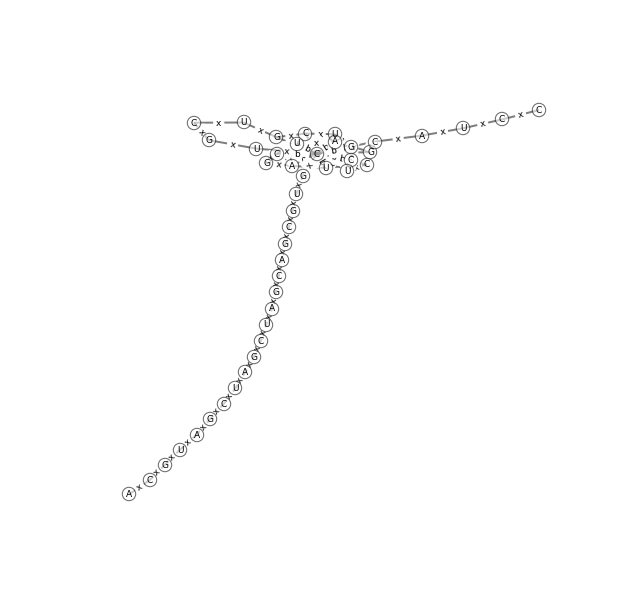

['ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA']
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA
im here
rnafold
('sequence', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA')
('out', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA\n(((((((........((.((((.(((((((.(((((...))))).))...))))).)))).))))))))). (-10.40)\n')
('seq', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA')
('strc', '(((((((........((.((((.(((((((.(((((...))))).))...))))).)))).))))))))).')
#################
('seq-graph', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA')
('struc-graph', '(((((((........((.((((.(((((((.(((((...))))).))...))))).)))).))))))))).')
71
71
('1', 0)
('2', '(')
('1', 1)
('2', '(')
('first i:', 1)
('first j:', 1)
('j', 1)
('st

IndexError: pop from empty list

In [232]:
#generating the graph
for seq in seqs:
    print seqs
    print seq
    seq, struc =fgraph._fold(seq)
        #_get_sequence_structure
    G = fgraph._make_graph(seq, struc)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

In [255]:
#from eden.util import display
seq2 = 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA'
seq, struc =fgraph._fold(seq2)
G = fgraph._make_graph(seq, struc)
display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

im here
rnafold
('sequence', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA')
('out', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA\n(((((((((((((((.((((.....(((((((...))))))).))))))))))).........)))))))). (-33.00)\n')
('seq', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA')
('strc', '(((((((((((((((.((((.....(((((((...))))))).))))))))))).........)))))))).')
#################
('seq-graph', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA')
('struc-graph', '(((((((((((((((.((((.....(((((((...))))))).))))))))))).........)))))))).')
72
72
('1', 0)
('2', '(')
('1', 1)
('2', '(')
('first i:', 1)
('first j:', 1)
('j', 1)
('stack_o:', ['('])
('open_len', 1)
('1', 2)
('2', '(')
('first i:', 2)
('first j:', 2)
('j', 2)
('stack_o:', ['(', '('])
('open_len', 2)
('1', 3)
('2', '(')
('first i:', 3)
('first j:', 3)
('j', 3)
('stack_o:', ['(', '(', '('])
('open_len', 3)
('1', 4)
('2', '(')
('fir

IndexError: pop from empty list